[0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.29, 1.52, 1.55, 1.6, 1.7, 1.8, 2.0, 2.2, 2.5, 5.52, 9.6, 20.5, 23.5, 35.0]
[0.678, 0.67, 0.63, 0.56, 0.49, 0.38, 0.3, 0.13, 0.0, -0.13999999999999999, -0.16, -0.18000000000000002, -0.215, -0.255, -0.32, -0.41000000000000003, -0.5, -0.72, -0.895, -1.125, -1.145, -1.16]
speed [mph]	regen brake force [m/s^2]
1.12		0.68
1.34		0.67
1.57		0.63
1.79		0.56
2.02		0.49
2.24		0.38
2.46		0.30
2.69		0.13
2.89		0.00
3.40		-0.14
3.47		-0.16
3.58		-0.18
3.81		-0.21
4.03		-0.26
4.48		-0.32
4.93		-0.41
5.60		-0.50
12.36		-0.72
21.50		-0.90
45.92		-1.12
52.64		-1.15
78.40		-1.16


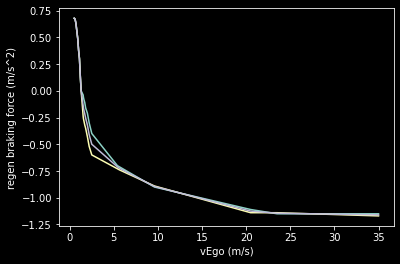

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# from first round of tests at 38mph
vEgo=[0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.28, 1.6, 2.4, 3.6, 4.6, 5.4, 12.0, 24.6, 29.0, 33.5]
aRegen=[0.678, 0.67, 0.63, 0.56, 0.49, 0.38, 0.3, 0.13, 0.0, -0.22, -0.52, -0.62, -0.72, -0.82, -1.1, -1.1, -0.90, -0.8]

# from better data from 89mph. one for 1% incline and one for decline
vEgo=[0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.29, 1.52, 1.55, 1.6, 1.7, 1.8, 2.0, 2.2, 2.5, 5.4, 9.6, 20.5, 23.5, 35.0]
vEgo1=[0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.29, 1.52, 1.55, 1.6, 1.7, 1.8, 2.0, 2.2, 2.5, 5.64, 9.6, 20.5, 23.5, 35.0]

aRegen=[0.678, 0.67, 0.63, 0.56, 0.49, 0.38, 0.3, 0.13, 0.0, -0.04, -0.06, -0.08, -0.11, -0.16, -0.21, -0.3, -0.4, -0.7, -0.9, -1.11, -1.15, -1.15]
aRegen1=[0.678, 0.67, 0.63, 0.56, 0.49, 0.38, 0.3, 0.13, 0.0, -0.24, -0.26, -0.28, -0.32, -0.35, -0.43, -0.52, -0.6, -0.74, -0.89, -1.14, -1.14, -1.17]

vEgoMid = ((np.array(vEgo) + np.array(vEgo1)) * 0.5).tolist()
aRegenMid = ((np.array(aRegen) + np.array(aRegen1)) * 0.5).tolist()

plt.plot(vEgo, aRegen)
plt.xlabel("vEgo (m/s)")
plt.ylabel("regen braking force (m/s^2)")

plt.plot(vEgo1, aRegen1)
plt.plot(vEgoMid, aRegenMid)

print(str(vEgoMid))
print(str(aRegenMid))

print("speed [mph]\tregen brake force [m/s^2]")
for s,a in zip(vEgoMid, aRegenMid):
    print(f"{s*2.24:0.2f}\t\t{a:0.2f}")

speed [mph]	regen brake force [m/s^2]
3.36		-0.01
3.58		-0.10
4.48		-0.25
5.94		-0.45
9.18		-0.61
13.22		-0.74
17.70		-0.83
22.40		-0.93
35.39		-1.06
48.83		-1.14
63.62		-1.17
78.40		-1.18


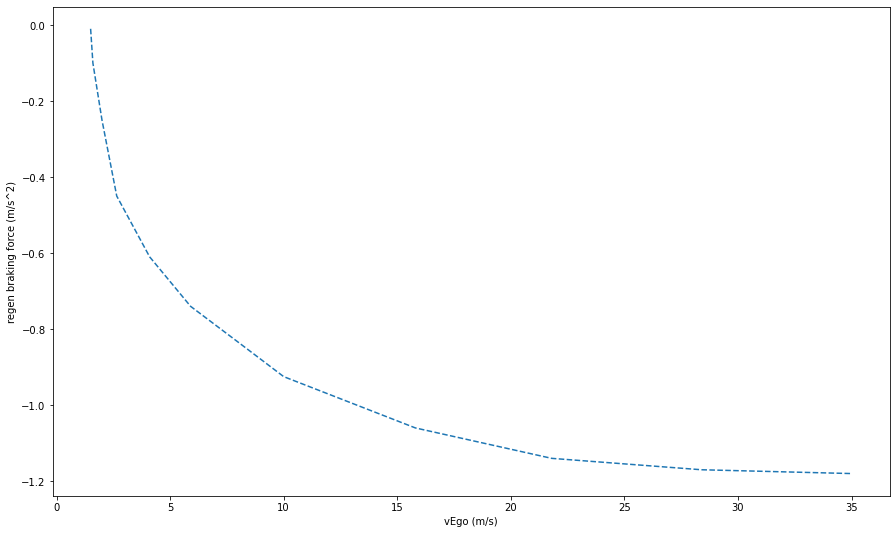

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

# from better data from 89mph. one for 1% incline and one for decline
vEgo=[1.5, 1.6, 2.0, 2.65, 4.1, 5.9, 7.9, 10.0, 15.8, 21.8, 28.4, 35.0]

aRegen=[-0.01, -0.1, -0.25, -0.45, -0.61, -0.74, -0.83, -0.925, -1.06, -1.14, -1.17, -1.18]

new_num_points = 200

# x_new is log spaced
x_new = np.logspace(np.log10(vEgo[0]), np.log10(vEgo[-1]), new_num_points)
# x_new = np.linspace(vEgo[0], vEgo[-1], new_num_points)
fy = interp1d(vEgo, aRegen, kind='quadratic')
y_new = fy(x_new)

plt.figure(figsize=(15,9))
# plt.plot(x_new, y_new)
plt.plot(vEgo, aRegen, linestyle='dashed')
plt.xlabel("vEgo (m/s)")
plt.ylabel("regen braking force (m/s^2)")


print("speed [mph]\tregen brake force [m/s^2]")
for s,a in zip(vEgo, aRegen):
    print(f"{s*2.24:0.2f}\t\t{a:0.2f}")

# print("speed [mph]\tregen brake force [m/s^2] (smoothed)")
# for s,a in zip(x_new, y_new):
#     print(f"{s*2.24:0.2f}\t\t{a:0.2f}")